# 2.1b: Multiple Linear Regression

## Stuff before exercises

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv("1b_FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf = df[["ENGINESIZE", "CYLINDERS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


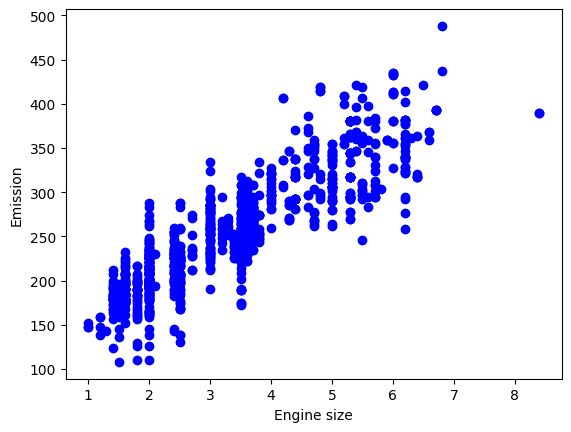

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

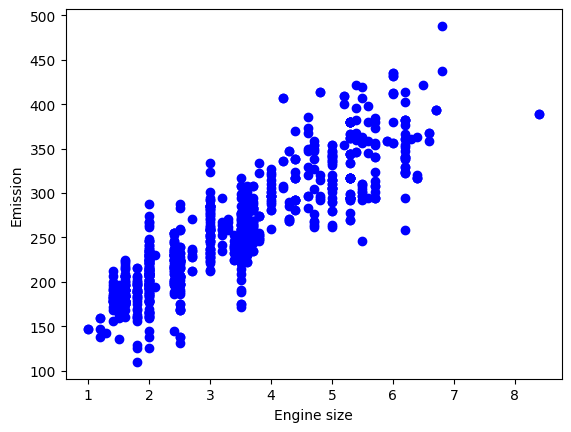

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
from sklearn import linear_model

In [16]:
exampleRegr = linear_model.LinearRegression()
exampleTrainX = train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
trainY = train[["CO2EMISSIONS"]]
exampleRegr.fit(exampleTrainX, trainY)

LinearRegression()

In [26]:
print(f"Coefficients: {exampleRegr.coef_}")
print(f"Intercept: {exampleRegr.intercept_}")

Coefficients: [[10.79680504  7.34300118  9.7928833 ]]
Intercept: [64.59546772]


In [19]:
exampleTestX = test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
testY = test[["CO2EMISSIONS"]]

exampleYHat = exampleRegr.predict(exampleTestX)

In [20]:
print(f"Mean squared error: {np.mean((exampleYHat - testY) ** 2)}")
print(f"Variance score: {exampleRegr.score(exampleTestX, testY)}")

Mean squared error: 599.2749710208842
Variance score: 0.8392680333896455


## Practice

In [29]:
# Try to use a multiple linear regression with the same dataset,
# but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY
# instead of FUELCONSUMPTION_COMB.
# Does it result in better accuracy?

trainX = train[["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
testX = test[["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]

regr = linear_model.LinearRegression()

regr.fit(trainX, trainY)
yHat = regr.predict(testX)

print(f"Mean squared error: {np.mean((yHat - testY) ** 2)}")
print(f"Variance score: {regr.score(testX, testY)}")

Mean squared error: 859.895399998125
Variance score: 0.7693668425940661


No; the error is worse.